In [131]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os.path
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [80]:
Data_New_file = pd.read_excel(r'E:\study\sdws\Данные сопротивлений\08Х18Н10Т 0,8 + 08Х18Н10Т 0,8 (I)\1\NewFile1.xlsx', header=None)
Data_New_file = Data_New_file.drop(columns=2, axis=1).loc[:,0:3]
Data_New_file

,0,1,3
0,0,"0,06",0
1,1,0,24
2,2,"0,06",24
3,3,0,0
4,4,"0,06",24
...,...,...,...
1195,1195,"-0,06",8
1196,1196,0,8
1197,1197,"-0,06",32
1198,1198,0,8


In [72]:
Data_New_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1200 non-null   int64 
 1   1       1200 non-null   object
 2   3       1200 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.2+ KB


False

In [84]:
count = 0
for k in sorted(os.listdir('E:\study\sdws\Данные сопротивлений\\')):
    for i in sorted(os.listdir(f'E:\study\sdws\Данные сопротивлений\\{k}\\')):
        if '.xlsx' in i:
            continue
        num_files = sum(
            os.path.isfile(os.path.join(f'E:\study\sdws\Данные сопротивлений\\{k}\\{i}', f))
            for f in os.listdir(f'E:\study\sdws\Данные сопротивлений\\{k}\\{i}'))
        for j in os.listdir(f'E:\study\sdws\Данные сопротивлений\\{k}\\{i}\\'):
            equal_shape = pd.read_excel(f'E:\study\sdws\Данные сопротивлений\\{k}\\{i}\\{j}', header=None, sheet_name='1')
            equal_shape = equal_shape.drop(columns=2, axis=1).loc[:,0:3]
            count += 1
            if (equal_shape.shape != Data_New_file.shape):
                print(f'Разница в размерах массива - {k}\\{i}\\{j}')
            if Data_New_file.isnull().values.any() != equal_shape.isnull().values.any():
                print(f'Есть миссинги - {k}\\{i}\\{j}')
print(count)

16710


In [51]:
Data_RBE = pd.read_csv(r'E:\study\sdws\Data RBE.csv')
Data_RBE

,Material 1,"Thickness 1, mm","Specific electrical resistance 1, 10^-8 Ω*m",Material 2,"Thickness 2, mm","Specific electrical resistance 2, 10^-8 Ω*m",Current modes,"RBE cold (max), mΩ","RBE cold (mean), mΩ","RBE cold (min), mΩ","RBE preheated (max), mΩ","RBE preheated (mean), mΩ","RBE preheated (min), mΩ",SD cold,MAD cold,SD preheated,MAD preheated
0,Al-6Mg,1.0,6.73,Al-6Mg,1.0,6.73,1,2.123412,1.061125,0.617512,0.836321,0.566652,0.686995,0.321581,0.251744,0.059599,0.048286
1,Al-6Mg,1.0,6.73,Al-6Mg,1.0,6.73,2,2.517593,1.281154,0.696197,0.898464,0.779271,0.617112,0.394799,0.315476,0.056041,0.044755
2,Al-6Mg,1.0,6.73,Al-6Mg,1.0,6.73,3,4.426998,2.452138,0.885310,0.989768,0.794157,0.644028,0.753368,0.629301,0.059209,0.048725
3,Al-6Mg,1.0,6.73,Al-6Mg,1.0,6.73,4,4.394035,2.163202,0.751577,1.011246,0.827882,0.691713,0.784001,0.650489,0.063266,0.051647
4,Al-6Mg,1.0,6.73,CP Cu,0.8,1.72,1,1.124251,0.586993,0.314403,0.536818,0.392482,0.278852,0.161398,0.130022,0.057327,0.048343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Zr-1Nb,0.5,55.00,Zr-1Nb,0.8,55.00,4,4.566824,3.155837,1.721226,1.482740,1.294875,1.123914,0.572192,0.457662,0.087841,0.075715
76,Zr-1Nb,0.8,55.00,Zr-1Nb,0.8,55.00,1,3.421064,2.056810,1.286650,1.376677,1.205161,1.083399,0.450837,0.382723,0.058641,0.047005
77,Zr-1Nb,0.8,55.00,Zr-1Nb,0.8,55.00,2,4.626502,2.664402,1.442163,1.454576,1.207507,1.109360,0.742219,0.618191,0.049392,0.036787
78,Zr-1Nb,0.8,55.00,Zr-1Nb,0.8,55.00,3,5.177028,2.963129,1.753292,1.619857,1.354651,1.263373,0.663710,0.537608,0.048947,0.037838


In [85]:
Data_RBE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Material 1                                   80 non-null     object 
 1   Thickness 1, mm                              80 non-null     float64
 2   Specific electrical resistance 1, 10^-8 Ω*m  80 non-null     float64
 3   Material 2                                   80 non-null     object 
 4   Thickness 2, mm                              80 non-null     float64
 5   Specific electrical resistance 2, 10^-8 Ω*m  80 non-null     float64
 6   Current modes                                80 non-null     int64  
 7   RBE cold (max), mΩ                           80 non-null     float64
 8   RBE cold (mean), mΩ                          80 non-null     float64
 9   RBE cold (min), mΩ                           80 non-null     float64
 10  RBE 

In [21]:
print(f'Data_RBE size = {Data_RBE.shape}')

Data_RBE size = (80, 17)


In [22]:
Data_RBE.describe()

,"Thickness 1, mm","Specific electrical resistance 1, 10^-8 Ω*m","Thickness 2, mm","Specific electrical resistance 2, 10^-8 Ω*m",Current modes,"RBE cold (max), mΩ","RBE cold (mean), mΩ","RBE cold (min), mΩ","RBE preheated (max), mΩ","RBE preheated (mean), mΩ","RBE preheated (min), mΩ",SD cold,MAD cold,SD preheated,MAD preheated
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.495000,34.209000,0.580000,34.344500,2.500000,2.883235,1.802969,1.047415,0.950811,0.824443,0.716765,0.359985,0.288936,0.044950,0.035802
std,0.253532,28.794717,0.224116,29.649663,1.125088,2.127168,1.406851,0.841862,0.597678,0.560227,0.502532,0.269355,0.219931,0.021411,0.017320
min,0.200000,1.720000,0.200000,1.720000,1.000000,0.321499,0.200191,0.117635,0.170811,0.130835,0.100473,0.035086,0.029117,0.013592,0.010910
25%,0.300000,7.000000,0.475000,7.000000,1.750000,0.657255,0.344518,0.205596,0.334370,0.237467,0.174594,0.083085,0.065702,0.028874,0.023140
50%,0.500000,25.500000,0.500000,25.500000,2.500000,3.155660,2.048704,0.868468,1.066538,0.914121,0.782210,0.366397,0.288132,0.045217,0.036497
75%,0.575000,59.500000,0.800000,59.500000,3.250000,4.816262,3.024136,1.781052,1.471539,1.305969,1.189313,0.600195,0.473617,0.053464,0.043556
max,1.000000,73.000000,1.000000,73.000000,4.000000,5.990000,4.485729,2.721644,2.022969,1.882236,1.440858,0.966057,0.816680,0.110302,0.090371


In [95]:
Data_RBE1 = pd.DataFrame(Data_RBE['RBE preheated (min), mΩ'] < Data_RBE['RBE preheated (mean), mΩ'], columns=['bool'])
if False in Data_RBE1['bool']:
    print(False)
else:
    print(True)

False


In [ ]:
#test model for formation data set
data_r = pd.DataFrame(columns=['u', 'i'])
df = pd.read_excel(r'E:\study\sdws\Данные сопротивлений\Э110 0,5 + Э110 0,5 (I)\\1\NewFile1.xlsx',
                   header=None, sheet_name='1')
df_u = pd.read_excel(r'E:\study\sdws\Данные сопротивлений\Э110 0,5 + Э110 0,5 (I)\\1\NewFile1.xlsx',
                     header=None, sheet_name='u')
df_i = pd.read_excel(r'E:\study\sdws\Данные сопротивлений\Э110 0,5 + Э110 0,5 (I)\\1\NewFile1.xlsx',
                     header=None, sheet_name='i')
data = pd.DataFrame()
data_end = pd.DataFrame(columns=['r_h_mean', 'r_h_min', 'r_h_max', 'r_h_std', 'r_h_mad'])

data = data.assign(u=df_u[1].values, i=df_i[1].values)

data = data.dropna()
while data['i'].iloc[-1] < 900.:
    data = data[:-1]


data = data.drop(data[(data['i'] < (data['i'][-100:-50].mean())*0.97) |
                      (data['i'] > (data['i'][-100:-50].mean())*1.03)].index)
while data.shape[0] > 1:
    if (data.index[1] - data.index[0]) != 1:
        data = data[1:]
        data_r = pd.DataFrame(columns=['u', 'i'])
    else:
        data_r = data_r.append(data[:1], ignore_index=False)
        data = data[1:]


data_r = data_r.append(data[-1:], ignore_index=False)
data_r = data_r.assign(r=(data_r['u'] / data_r['i'] * 1000).values)
data_end = data_end.append({'r_h_mean': data_r.mean(),
                            'r_h_min': data_r.min(),
                            'r_h_max': data_r.max(),
                            'r_h_std': data_r,
                            'r_h_mad': data_r}, ignore_index=True)
data_end.to_csv('E:\study\sdws\Data_set.csv', sep=',')

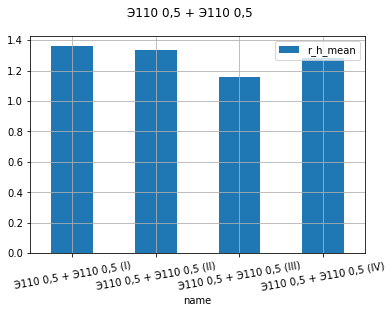

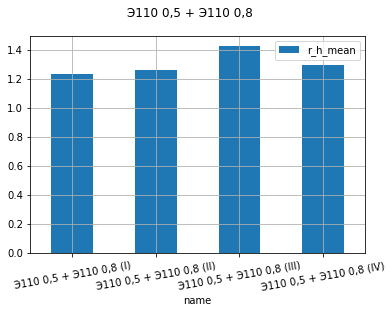

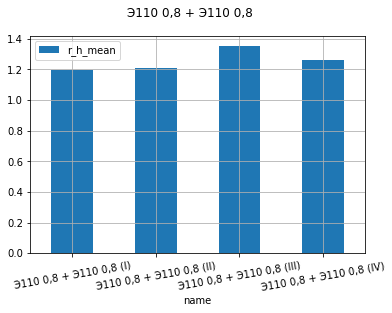

In [102]:
%matplotlib inline
df = pd.read_csv(r'E:\study\sdws\Data_set.csv')
for i in range(18, int(df.shape[0]/4)):
    df1 = df.loc[i*4:i*4+3]
    df1.plot(x='name', y=['r_h_mean'], kind='bar')
    plt.suptitle((df['name'].iloc[i * 4])[:-3], fontsize=12, color='black')
    plt.xticks(rotation=10)
    plt.grid(True)

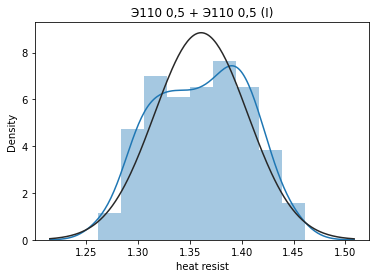

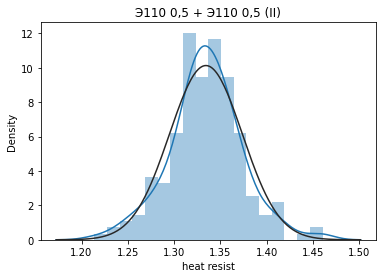

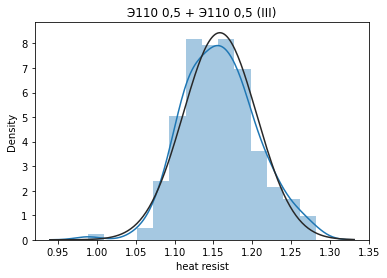

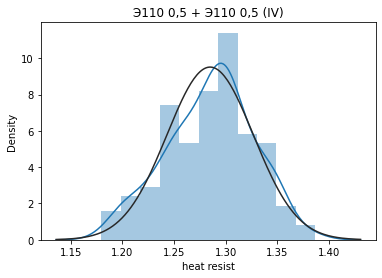

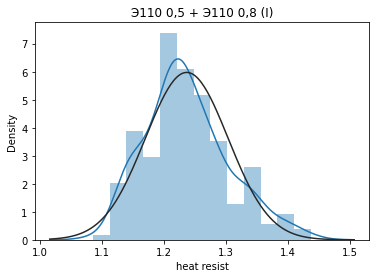

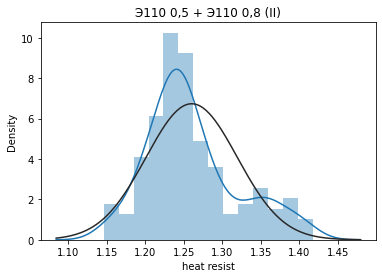

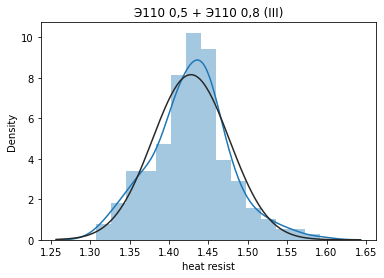

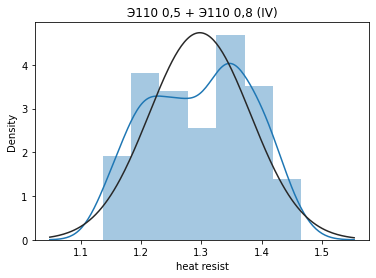

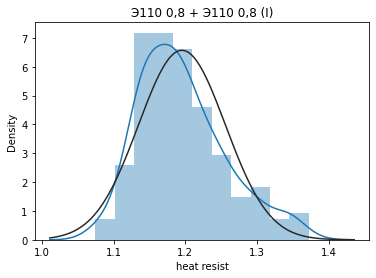

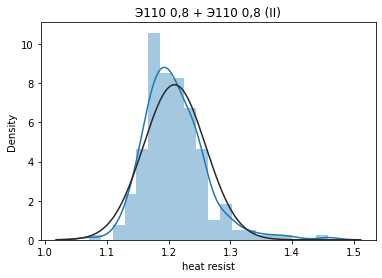

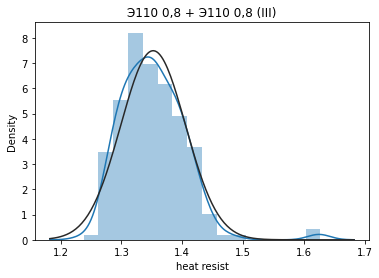

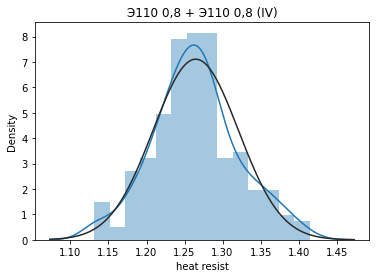

In [111]:
%matplotlib inline
file = sorted(os.listdir('E:\study\sdws\\result_test_1'))
for k in file:
    if ('Э110' in k) and ('ОТ4-1' not in k):
        data = pd.read_csv(fr'E:\study\sdws\\result_test_1\{k}')
        ax = sns.distplot(data['r_h_mean'], fit=norm)
        ax.set_xlabel('heat resist')
        ax.set(title=f'{k}'[0:-4])
        plt.show()

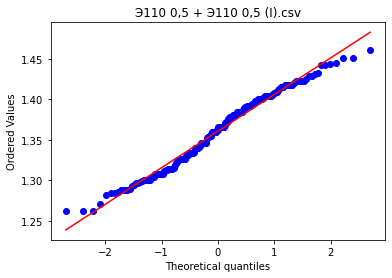

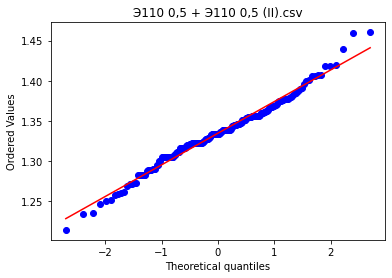

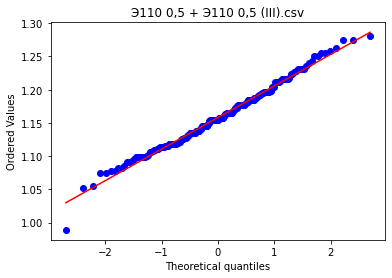

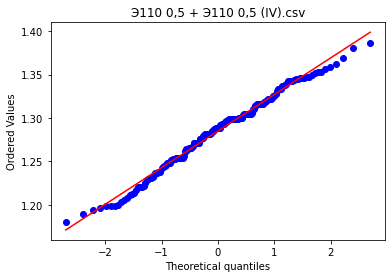

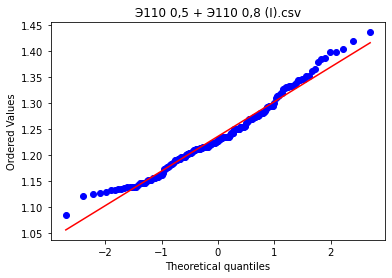

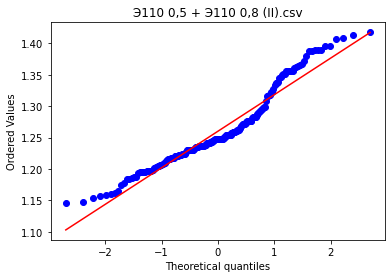

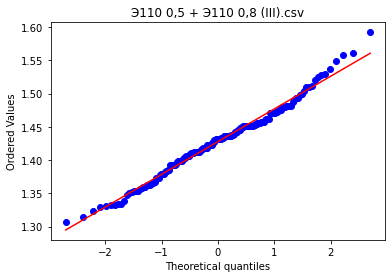

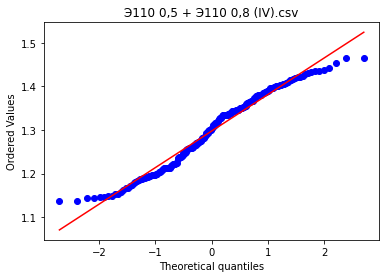

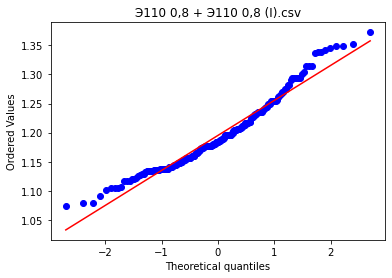

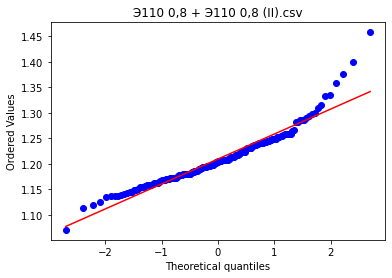

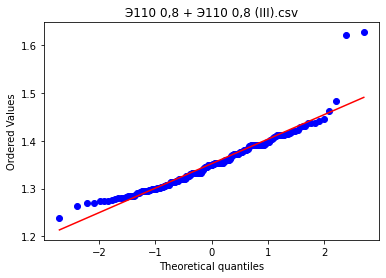

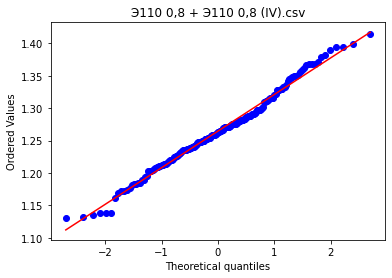

In [137]:
%matplotlib inline
file = sorted(os.listdir('E:\study\sdws\\result_test_1'))
for k in file:
    if ('Э110' in k) and ('ОТ4-1' not in k):
        data = pd.read_csv(fr'E:\study\sdws\\result_test_1\{k}')
        stats.probplot(data['r_h_mean'], dist="norm", plot=plt)
        plt.title(k)
        plt.show()

In [114]:
count = 0
count_name = pd.Series(dtype='object')
resist = pd.Series(dtype='float64')
for i in sorted(os.listdir('E:\study\sdws\\result_test_1')):
    if count < 4:
        df_read = pd.read_csv(f'E:\study\sdws\\result_test_1\\{i}')
        count_name = count_name.append(pd.Series(len(df_read) * [i]), ignore_index=True)
        resist = resist.append(df_read['r_h_mean'], ignore_index=True)
        count += 1
        if count == 4:
            df_write = pd.DataFrame({'name': count_name,
                                     'resistance': resist})
            anova = ols('resistance ~ name', data=df_write).fit()
            table = sm.stats.anova_lm(anova)
            print(i[:-8])
            print(table)
            print()
            count_name = pd.Series(dtype='object')
            resist = pd.Series(dtype='float64')
            count = 0

08Х18Н10Т 0,8 + 08Х18Н10Т 0,8 
             df    sum_sq   mean_sq           F         PR(>F)
name        3.0  2.741984  0.913995  223.864721  2.741083e-105
Residual  796.0  3.249909  0.004083         NaN            NaN

12Х18Н10Т 0,3 + 08Х18Н10Т 0,8 
             df    sum_sq   mean_sq           F        PR(>F)
name        3.0  2.281683  0.760561  171.201485  1.172707e-85
Residual  797.0  3.540665  0.004442         NaN           NaN

12Х18Н10Т 0,3 + 12Х18Н10Т 0,3 
             df    sum_sq   mean_sq         F    PR(>F)
name        3.0  0.048995  0.016332  4.094338  0.006738
Residual  797.0  3.179129  0.003989       NaN       NaN

12Х18Н10Т 0,3 + 12Х18Н10Т 0,5 
             df    sum_sq   mean_sq        F        PR(>F)
name        3.0  0.640429  0.213476  47.3376  3.693754e-28
Residual  797.0  3.594199  0.004510      NaN           NaN

12Х18Н10Т 0,5 + 12Х18Н10Т 0,5 
             df    sum_sq   mean_sq          F        PR(>F)
name        3.0  0.134923  0.044974  12.194424  8.294855e-08

реальное
                              name         I        II       III        IV
0   08Х18Н10Т 0,8 + 08Х18Н10Т 0,8   1.379635  1.453350  1.527981  1.513727
1   12Х18Н10Т 0,3 + 08Х18Н10Т 0,8   1.296606  1.249337  1.387932  1.267439
2   12Х18Н10Т 0,3 + 12Х18Н10Т 0,3   1.036212  1.023396  1.014250  1.023176
3   12Х18Н10Т 0,3 + 12Х18Н10Т 0,5   1.279711  1.246179  1.215377  1.208402
4   12Х18Н10Т 0,5 + 12Х18Н10Т 0,5   1.359435  1.387658  1.391567  1.388487
5                 Амг6 1 + Амг6 1   0.682306  0.756758  0.794165  0.793897
6                 Амг6 1 + М1 0,8   0.373196  0.421899  0.480141  0.428735
7     БрБНТ1,9 0,2 + БрБНТ1,9 0,2   0.147522  0.226007  0.219364  0.232231
8     БрБНТ1,9 0,2 + БрБНТ1,9 0,5   0.282459  0.322958  0.315093  0.362718
9     БрБНТ1,9 0,5 + БрБНТ1,9 0,5   0.237613  0.264622  0.277179  0.342527
10         БрБНТ1,9 0,5 + Л63 0,2   0.217123  0.232794  0.246824  0.282430
11              Л63 0,2 + Л63 0,2   0.154604  0.132842  0.111281  0.131722
12              

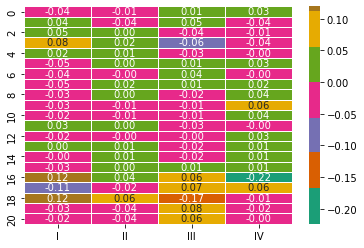

In [136]:
%matplotlib inline
df = pd.read_csv(r'E:\study\sdws\Data_set.csv')
change = df['r_h_mean'].values.reshape(21, 4)
chi2, p, dof, expected = chi2_contingency(change)
df_val = pd.DataFrame(change, columns=['I', 'II', 'III', 'IV'])
df_val = df_val.assign(name=lambda x: [x[:-3] for x in df['name'].iloc[::4]])
df_val = df_val[['name', 'I', 'II', 'III', 'IV']]
print('реальное')
print(df_val)
print()
df_val_chi = pd.DataFrame(expected, columns=['I', 'II', 'III', 'IV'])
df_val_chi = df_val_chi.assign(name=lambda x: [x[:-3] for x in df['name'].iloc[::4]])
df_val_chi = df_val_chi[['name', 'I', 'II', 'III', 'IV']]
print('ожидаемое')
print(df_val_chi)

num_cols = df['name'].iloc[::4]
df_hm = (df_val.loc[:,['I', 'II', 'III', 'IV']] - df_val_chi.loc[:,['I', 'II', 'III', 'IV']])
sns.heatmap(df_hm, vmin=df_hm.min().min(), vmax=df_hm.max().max(), linewidths=.5, cmap="Dark2", center=0, annot=True, fmt=".2f")
sns.color_palette("coolwarm", as_cmap=True)
plt.show()